In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# load data
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

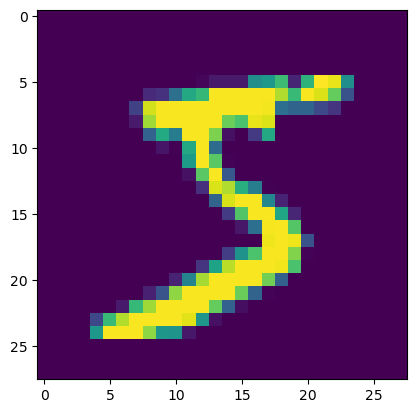

In [3]:
plt.imshow(X_train[0])

In [4]:
# có 60k ảnh để train, 10k ảnh để test
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
# Flatten ảnh
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

X_train.shape

(60000, 28, 28, 1)

In [6]:
y_train[:5], y_test[:5]

(array([5, 0, 4, 1, 9], dtype=uint8), array([7, 2, 1, 0, 4], dtype=uint8))

In [7]:
# build model

model = keras.Sequential([
    #cnn
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape = (28, 28, 1), padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    
    #Dense
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
                        
model.compile(
    optimizer='adam', # hàm tối ưu
    loss='sparse_categorical_crossentropy', # dùng với y_train là mảng 1 chiều
    metrics=['accuracy'])

model.summary()                      

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                2

In [9]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0669 - accuracy: 0.9800
Epoch 2/10
1875/1875 [==============================] - 137s 73ms/step - loss: 0.0500 - accuracy: 0.9851
Epoch 3/10
1875/1875 [==============================] - 137s 73ms/step - loss: 0.0410 - accuracy: 0.9875
Epoch 4/10
1875/1875 [==============================] - 127s 68ms/step - loss: 0.0346 - accuracy: 0.9895
Epoch 5/10
1875/1875 [==============================] - 128s 69ms/step - loss: 0.0306 - accuracy: 0.9906
Epoch 6/10
1875/1875 [==============================] - 132s 71ms/step - loss: 0.0242 - accuracy: 0.9929
Epoch 7/10
1875/1875 [==============================] - 132s 70ms/step - loss: 0.0236 - accuracy: 0.9927
Epoch 8/10
1875/1875 [==============================] - 155s 83ms/step - loss: 0.0210 - accuracy: 0.9936
Epoch 9/10
1875/1875 [==============================] - 190s 101ms/step - loss: 0.0183 - accuracy: 0.9947
Epoch 10/10
1875/1875 [==============================]

In [10]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.0769 - accuracy: 0.9857


[0.0768698900938034, 0.9857000112533569]

In [19]:
y_pred = model.predict(X_test)

313/313 [==============================] - 5s 15ms/step


In [20]:
y_pred[:5]

array([[3.48513479e-26, 2.15163436e-15, 6.16327983e-19, 2.46086312e-16,
        1.16861510e-14, 1.48796190e-23, 1.30754489e-28, 1.00000000e+00,
        4.88408379e-18, 1.16679071e-11],
       [7.89048083e-18, 5.09585973e-17, 1.00000000e+00, 1.36420595e-17,
        1.42444225e-27, 1.89879232e-19, 8.65095615e-21, 2.60426446e-21,
        2.92446463e-17, 4.44715829e-27],
       [2.33422614e-20, 1.00000000e+00, 6.27689198e-13, 2.20909532e-12,
        2.04968097e-18, 5.43051848e-17, 9.54673285e-11, 1.43612837e-13,
        3.25254147e-13, 2.83516613e-12],
       [1.00000000e+00, 2.05077817e-12, 8.36292900e-17, 2.02120615e-13,
        4.47562151e-16, 3.29179291e-16, 1.15160458e-13, 2.98570509e-11,
        2.54018594e-12, 2.14352381e-15],
       [3.11302083e-22, 1.02377564e-17, 2.29880454e-16, 6.13482828e-26,
        9.99999881e-01, 1.57177544e-22, 3.36776489e-21, 3.89020436e-18,
        2.94842746e-15, 1.62669537e-07]], dtype=float32)

In [21]:
# đưa y_pred về mảng 1 chiều 
# trả y về vị trí có giá trị dự đoán lớn nhất(chính là số cần dự đoán)
y_pred = [np.argmax(i) for i in y_pred]

In [23]:
y_pred[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [24]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)